In [ ]:
import torch
import os
import matplotlib.pyplot as plt 
import torchvision.transforms as transforms
from model import VGG,CNN
import torch.nn as nn
import numpy as np
import cv2
from util import detect_face,caculateFeature
import matplotlib.pyplot as plt 
from matplotlib import gridspec, cm

embedding_size=4096
n_classes=8631
threshold=1.25
face_size=(224,224)

result_path='./result'
model_path=os.path.join(result_path,'best_model.pth')
test_data_path='./data/test_data'
base_path=os.path.join(test_data_path,'database')
test_path=os.path.join(test_data_path,'test')

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')



In [2]:
def compareFeature(featureSet,target,threshold):
    minD=10
    result=None 
    test={}
    for name in featureSet:
        pdist = nn.PairwiseDistance(p=2)
        distance=pdist(feature.unsqueeze(0),dataBaseFeature[name].unsqueeze(0))
        test[name]=distance
        if distance<minD:
            result=name
            minD=distance
    if minD>threshold:
        result='Unknown'
    return result,minD.item()

In [3]:
classifier=CNN(embedding_size,n_classes)
classifier.load_state_dict(torch.load(model_path))
featureNet=classifier.backbone
featureNet=featureNet.cuda()
featureNet=featureNet.eval()


In [4]:
dataBaseImg={}
img_files=os.listdir(base_path)
for file_name in img_files:
    name=file_name.split('.')[0]
    img=cv2.imread(os.path.join(base_path,file_name))
    dataBaseImg[name]=img

In [5]:
dataBaseFeature={}
for name in dataBaseImg:
    face,_=detect_face(dataBaseImg[name],face_cascade)
    
    dataBaseFeature[name]=caculateFeature(face,featureNet,face_size)

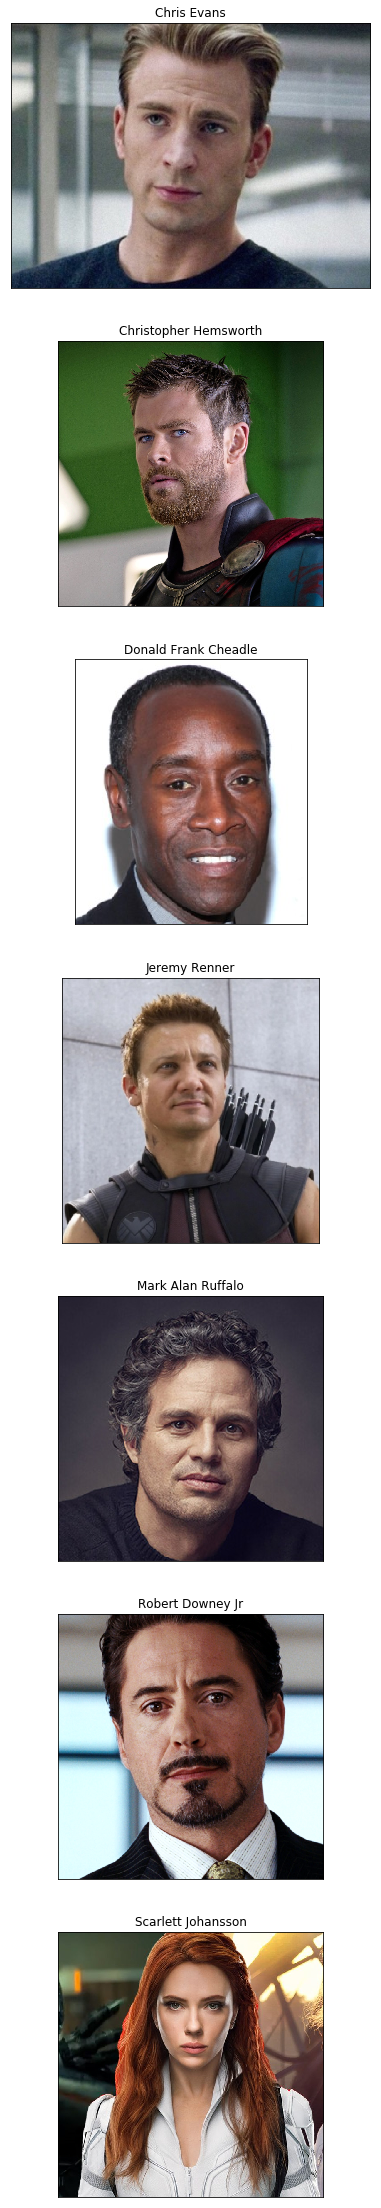

In [8]:
fig = plt.figure(figsize=(40, 40))
gs = gridspec.GridSpec(len(dataBaseImg),1)
for i,name in enumerate(dataBaseImg):
    ax = plt.subplot(gs[i,0])
    
    img=dataBaseImg[name]
    show = img[:,:,::-1]

    ax.imshow(show)
    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])

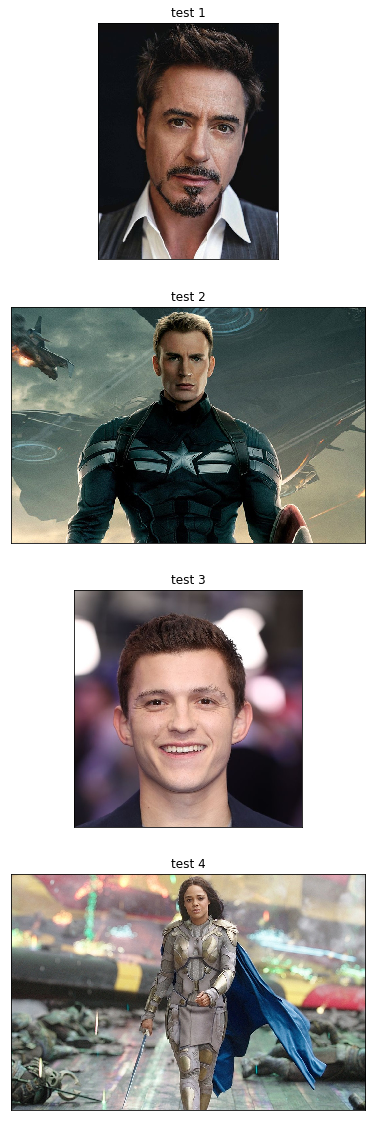

In [10]:
test_img_path=[
    os.path.join(test_path,'01.jpg'),
    os.path.join(test_path,'02.jpg'),
    os.path.join(test_path,'03.jpg'),
    os.path.join(test_path,'04.jpg')
]


fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(len(test_img_path),1)
for i, path in enumerate(test_img_path):
    ax = plt.subplot(gs[i,0])
    
    img=cv2.imread(path)
    show = img[:,:,::-1]

    ax.imshow(show)
    ax.set_title('test {}'.format(i+1))
    ax.set_xticks([])
    ax.set_yticks([])

## Test 1

result:Robert Downey Jr 
distance:0.9137570261955261


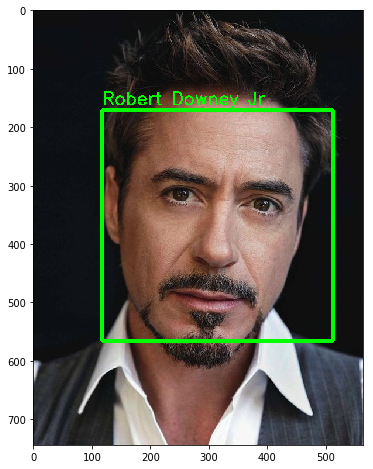

In [22]:
img=cv2.imread(os.path.join(test_path,'01.jpg'))
face,box=detect_face(img,face_cascade)


feature=caculateFeature(face,featureNet,face_size)
result,distance=compareFeature(dataBaseFeature,feature,threshold)

print('result:{} \ndistance:{}'.format(result,distance))

(x, y, w, h)=box

cv2.rectangle(img, (x, y), (x + w, y + h),(0,255,0),5)

cv2.putText(img, result, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),2)

fig = plt.figure(figsize=(8, 8))
show = img[:,:,::-1]
plt.imshow(show)



## test2

result:Chris Evans 
distance:1.0008965730667114


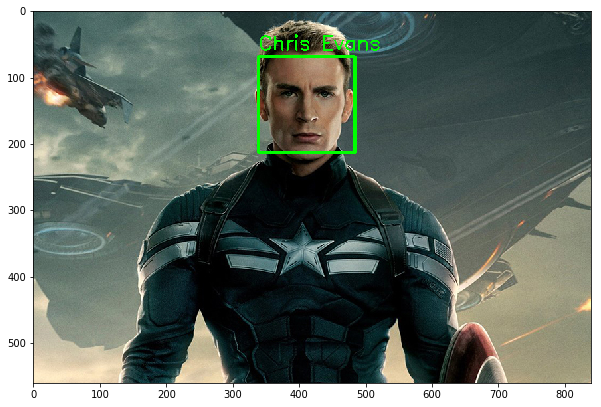

In [23]:
img=cv2.imread(os.path.join(test_path,'02.jpg'))
face,box=detect_face(img,face_cascade)


feature=caculateFeature(face,featureNet,face_size)
result,distance=compareFeature(dataBaseFeature,feature,threshold)

print('result:{} \ndistance:{}'.format(result,distance))

(x, y, w, h)=box

show = cv2.rectangle(img, (x, y), (x + w, y + h),(0,255,0),3)

cv2.putText(show, result, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)




fig = plt.figure(figsize=(10, 10))
show = show[:,:,::-1]
plt.imshow(show)



## test3

result:Unknown 
distance:1.2805585861206055


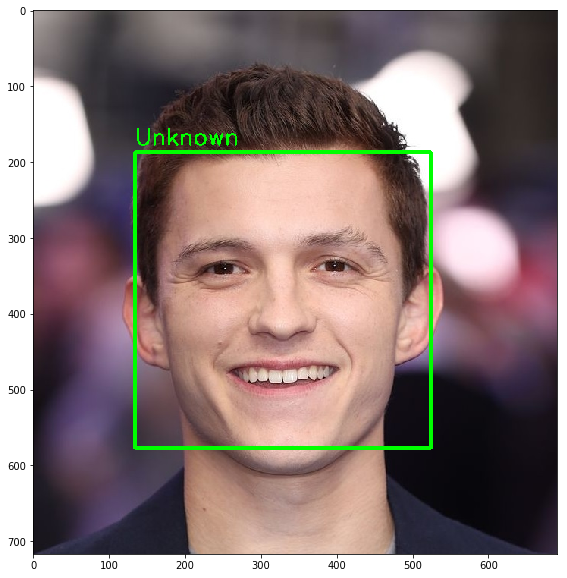

In [24]:
img=cv2.imread(os.path.join(test_path,'03.jpg'))
face,box=detect_face(img,face_cascade)


feature=caculateFeature(face,featureNet,face_size)
result,distance=compareFeature(dataBaseFeature,feature,threshold)

print('result:{} \ndistance:{}'.format(result,distance))

(x, y, w, h)=box

show = cv2.rectangle(img, (x, y), (x + w, y + h),(0,255,0),3)

cv2.putText(show, result, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)


fig = plt.figure(figsize=(10, 10))
show = show[:,:,::-1]
plt.imshow(show)



## test4

result:Unknown 
distance:1.2733429670333862


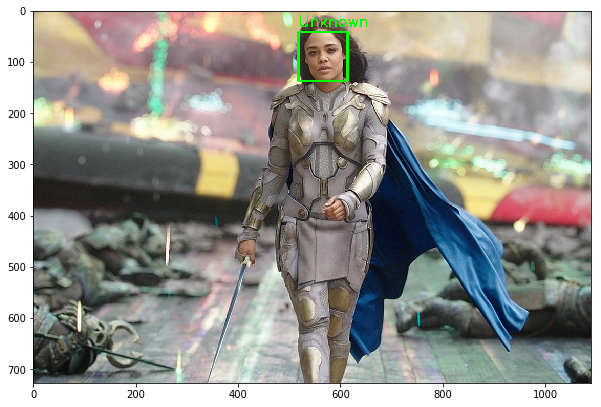

In [25]:
img=cv2.imread(os.path.join(test_path,'04.jpg'))
face,box=detect_face(img,face_cascade)


feature=caculateFeature(face,featureNet,face_size)
result,distance=compareFeature(dataBaseFeature,feature,threshold)

print('result:{} \ndistance:{}'.format(result,distance))

(x, y, w, h)=box

show = cv2.rectangle(img, (x, y), (x + w, y + h),(0,255,0),3)

cv2.putText(show, result, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)


fig = plt.figure(figsize=(10, 10))
show = show[:,:,::-1]
plt.imshow(show)